# Hodgkin-Huxley IK Problem

This example shows how the Hodgkin-Huxley potassium current (IK) problem can be used.
For more information, see the [original 1952 paper](https://doi.org/10.1113/jphysiol.1952.sp004764).

In this problem, a sequence of voltages is applied to a model of an _ion current_ in the [giant axon of a squid](https://en.wikipedia.org/wiki/Squid_giant_axon).

Instead of creating a model, we create a [HodgkinHuxleyIKProblem](http://pints.readthedocs.io/en/latest/toy/hh_ik.html) object directly:


In [2]:
import pints
import pints.toy
import matplotlib.pyplot as plt

problem = pints.toy.HodgkinHuxleyIKProblem()

We can get an example set of parameters using the `suggested_parameters()` method:

In [3]:
x0 = problem.suggested_parameters()

Using this parameter set, we can run a simulation:

In [4]:
values = problem.evaluate(x0)

Like all single series problems, we can get the associated times with `times()`:

In [5]:
times = problem.times()

This gives us all we need to create a plot of current versus time:

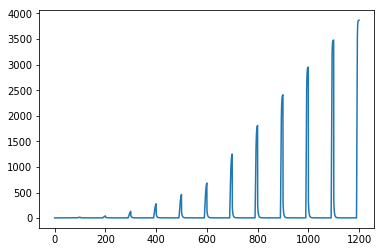

In [7]:
plt.figure()
plt.plot(times, values)
plt.show()

The voltage protocol used to generate this data consists of 12 segments, of 100ms each.
Each segment starts with 90ms at the _holding potential_, followed by a 10ms step to an increasing _step potential_.
During this step, a current is elicited, while the signal at the holding potential is almost zero.

A common way to represent this data is to show only the data during the step, and to _fold_ the steps over each other. This can be done using the `fold()` method:

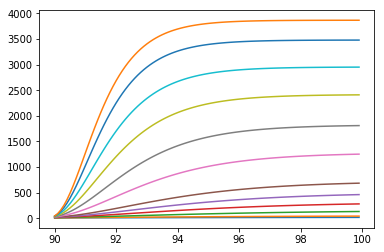

In [8]:
plt.figure()
for t, v in problem.fold(times, values):
    plt.plot(t, v)
plt.show()

This recreates Figure 3 in the original paper.